In [20]:
#import data handling libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

#read in the main dataset
df = pd.read_csv('final_dataset_Nov_24.csv')

df

,ENT_SEM,GRAD_SEM,25,101,104,105,106,140,142,143,...,SEM25.5_cdf,SEM26.0_cdf,SEM27.0_cdf,SEM28.0_cdf,SEM28.5_cdf,SEM29.5_cdf,SEM31.0_cdf,SEM32.0_cdf,slope,intercept
0,20.6,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-0.002632,0.157024
1,19.6,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.005640,-0.336480
2,19.6,3.4,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.003384,-0.201888
3,16.6,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.024441,-1.458081
4,18.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.000376,-0.022432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9705,14.6,4.8,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-0.002632,0.157024
9706,16.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.001504,-0.089728
9707,13.6,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,-0.003384,0.201888
9708,14.6,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.006016,-0.358912


In [21]:
courses = ['25',
 '101',
 '104',
 '105',
 '106',
 '140',
 '142',
 '143',
 '150',
 '151',
 '160',
 '165',
 '166',
 '181',
 '201',
 '207',
 '240',
 '265',
 '266',
 '267',
 '301',
 '302',
 '304',
 '314',
 '317',
 '341',
 '342',
 '350',
 '365',
 '373',
 '385',
 '397',
 '414',
 '415',
 '435',
 '436',
 '492',
 '495',
 '500']

print('Overall grad rate:', df['Y'].mean())

features = courses + ['ENT_SEM', 'SEM9.5_cdf','slope','intercept']
random_states = np.random.randint(0, 10000, size=5).tolist()

print('Random states:', random_states)

splits = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[features], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits.append((X_train, X_test, y_train, y_test))

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

Overall grad rate: 0.5038105046343976
Random states: [7520, 8535, 5970, 448, 3582]


In [22]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgb_models = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

xgb_df = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models):
    y_pred = search.predict(splits[i][1])
    xgb_df.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df.loc[i, 'test_accuracy'] = accuracy_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_precision'] = precision_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_recall'] = recall_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_f1'] = f1_score(splits[i][3], y_pred)
xgb_df

Best accuracy for split 0:  70.726%
Best accuracy for split 1:  71.151%
Best accuracy for split 2:  71.086%
Best accuracy for split 3:  71.370%
Best accuracy for split 4:  70.559%


,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.707261,0.709063,0.723243,0.684049,0.7031
1,0.711509,0.69516,0.713496,0.659509,0.685441
2,0.710863,0.699794,0.71632,0.668712,0.691698
3,0.713699,0.689495,0.697576,0.676892,0.687078
4,0.705587,0.711123,0.712106,0.715746,0.713921


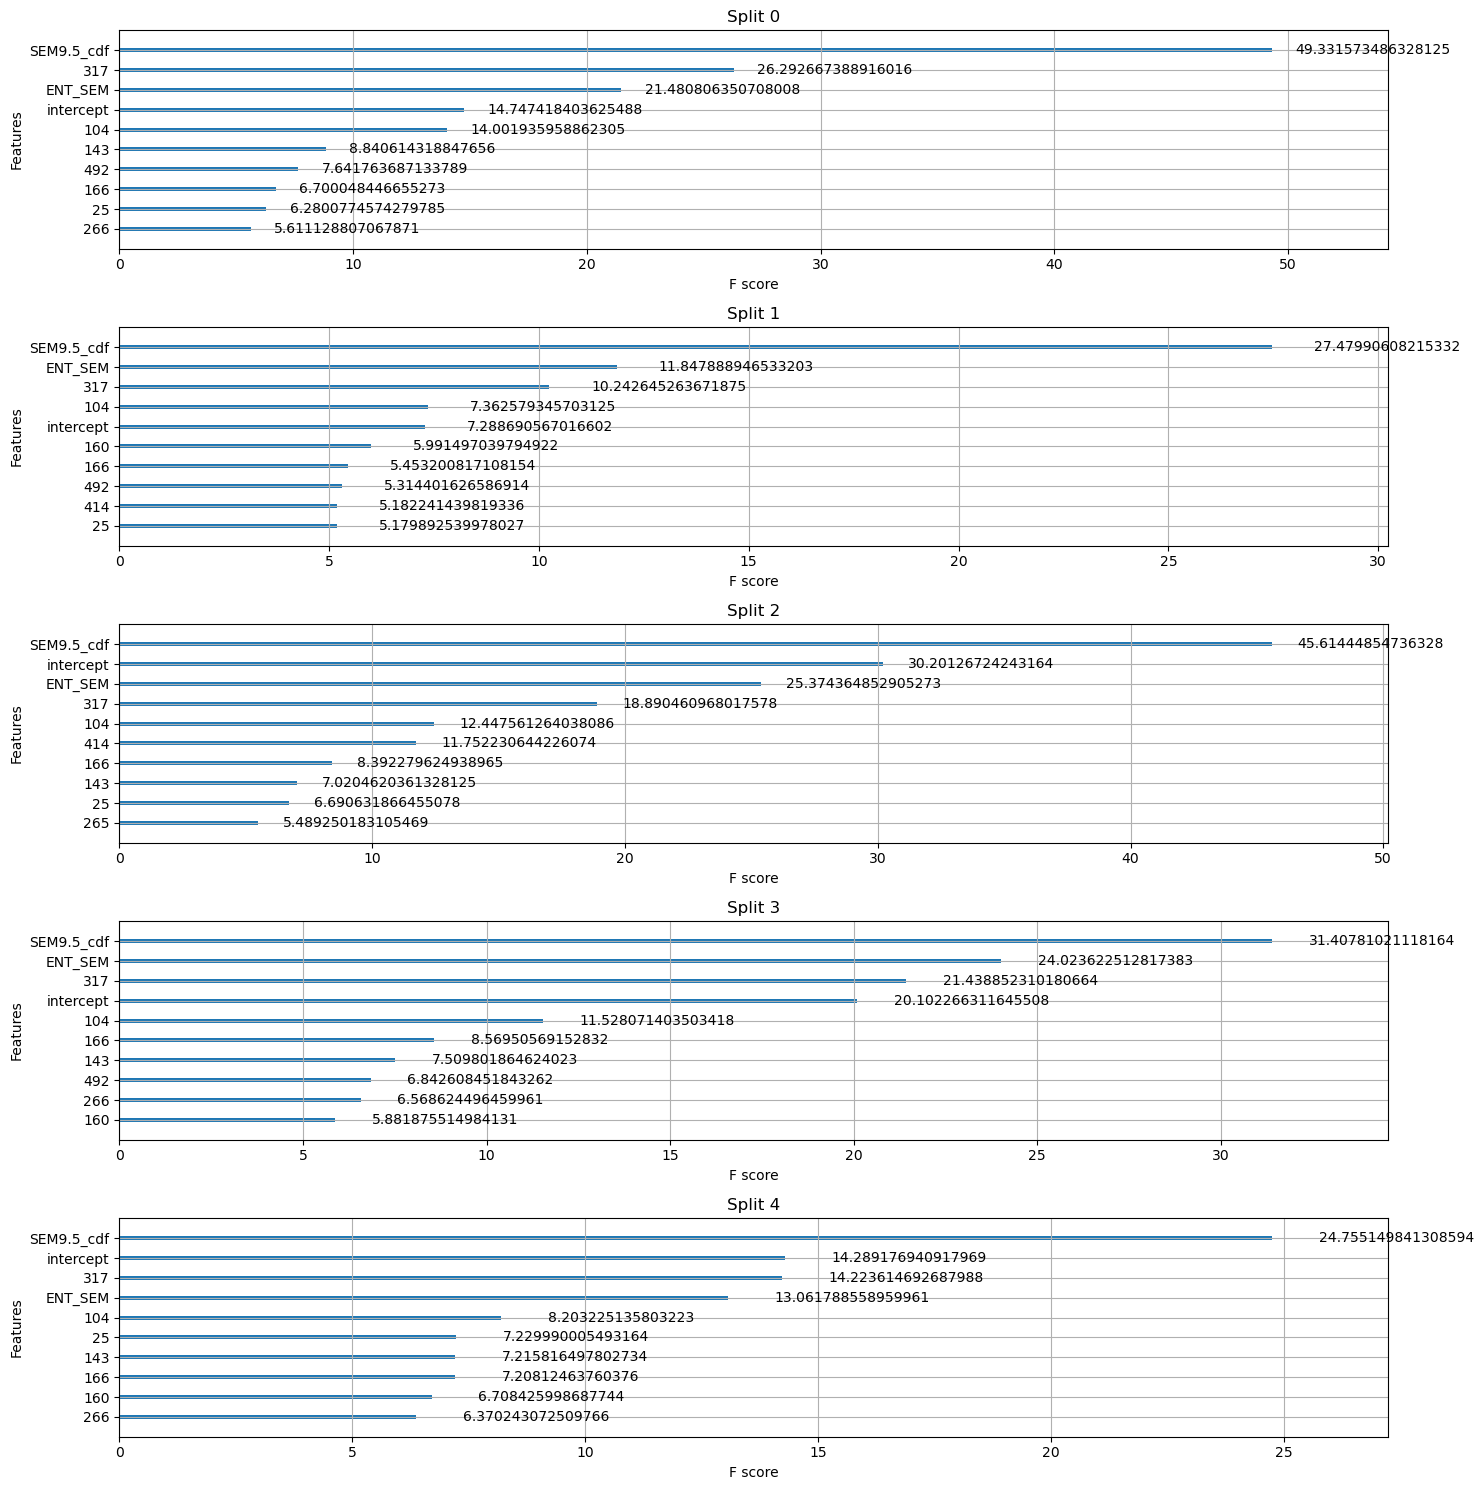

In [23]:
#for each xgb model, plot the feature importances (normalized to add up to 100)
#make each of these a subplot
fig, ax = plt.subplots(5, 1, figsize=(15, 15))

for i, search in enumerate(xgb_models):
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i], 
                        importance_type='gain', 
                        max_num_features=10,
                        title=f'Split {i}')

plt.tight_layout() 
plt.show()

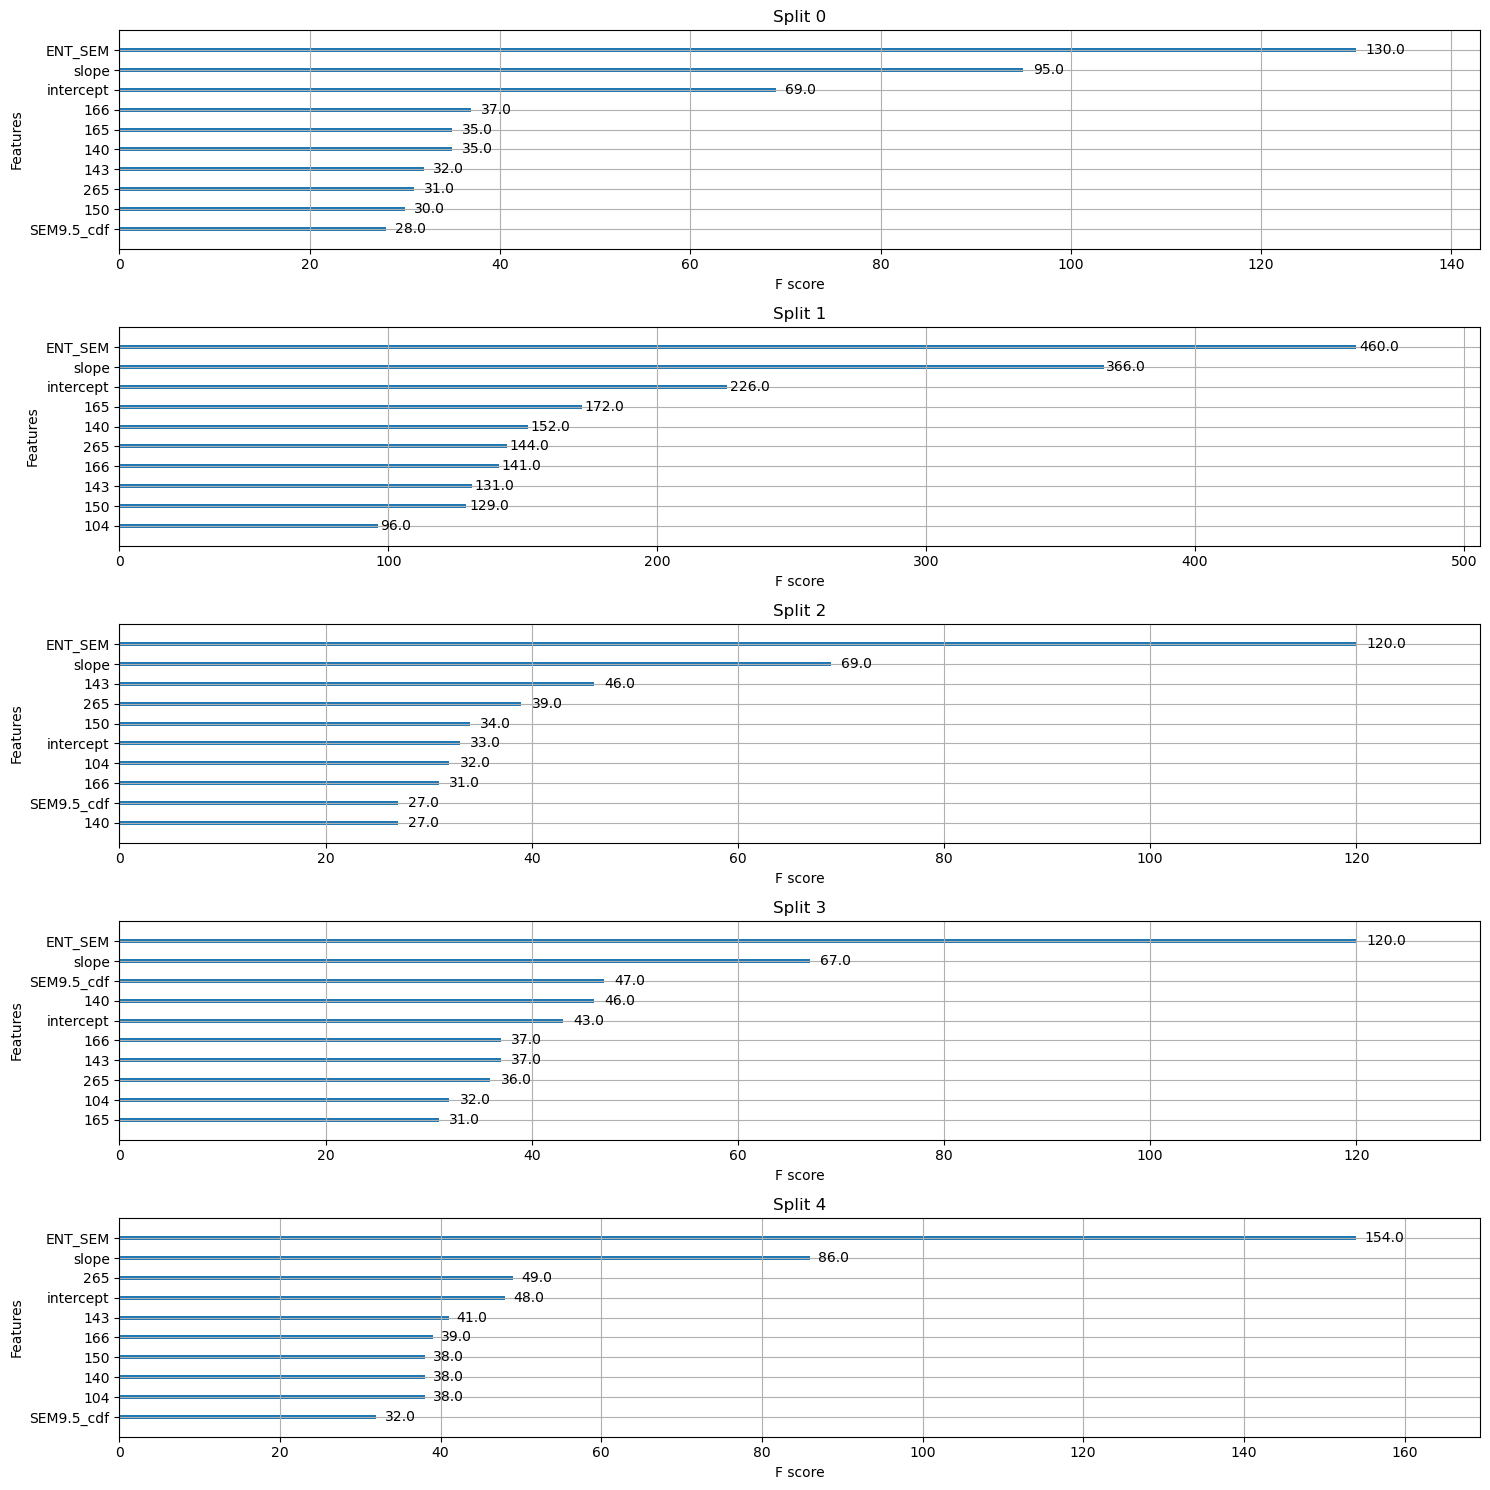

In [24]:
#for each xgb model, plot the feature importances (normalized to add up to 100)
#make each of these a subplot
fig, ax = plt.subplots(5, 1, figsize=(15, 15))

for i, search in enumerate(xgb_models):
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i], 
                        importance_type='weight', 
                        max_num_features=10,
                        title=f'Split {i}')

plt.tight_layout() 
plt.show()

In [25]:
features2 = ['ENT_SEM', 'SEM9.5_cdf','slope','intercept']

splits_2 = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[features2], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits_2.append((X_train, X_test, y_train, y_test))

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgb_models_2 = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits_2):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models_2.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

Best accuracy for split 0:  66.259%
Best accuracy for split 1:  65.461%
Best accuracy for split 2:  66.362%
Best accuracy for split 3:  65.809%
Best accuracy for split 4:  66.079%


In [26]:
xgb_df_2 = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models_2):
    y_pred = search.predict(splits_2[i][1])
    xgb_df_2.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df_2.loc[i, 'test_accuracy'] = accuracy_score(splits_2[i][3], y_pred)
    xgb_df_2.loc[i, 'test_precision'] = precision_score(splits_2[i][3], y_pred)
    xgb_df_2.loc[i, 'test_recall'] = recall_score(splits_2[i][3], y_pred)
    xgb_df_2.loc[i, 'test_f1'] = f1_score(splits_2[i][3], y_pred)
xgb_df_2

,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.662588,0.659629,0.657086,0.677914,0.667338
1,0.654609,0.666323,0.665,0.679959,0.672396
2,0.663622,0.643666,0.643,0.657464,0.650152
3,0.658087,0.650875,0.641509,0.695297,0.667321
4,0.660787,0.651905,0.640858,0.702454,0.670244


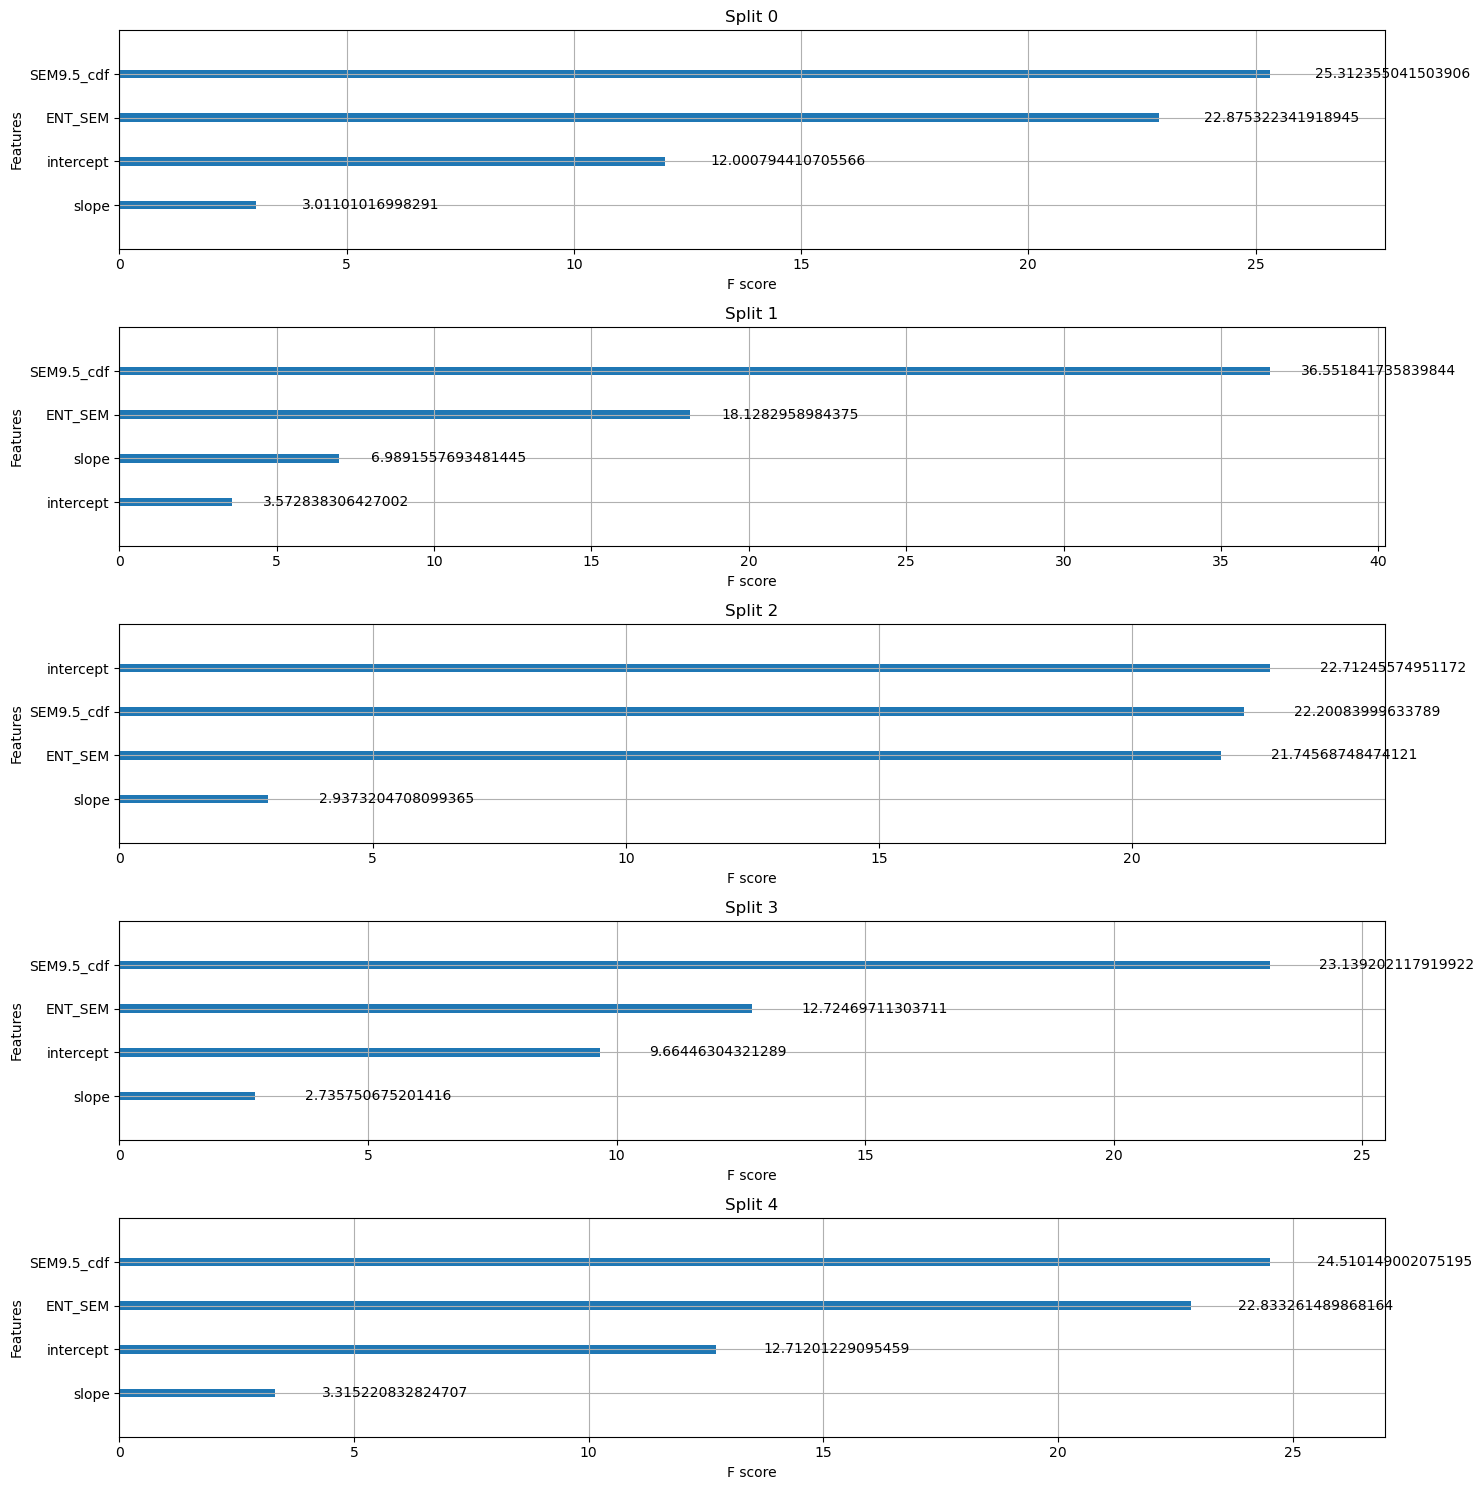

In [27]:
#for each xgb model, plot the feature importances (normalized to add up to 100)
#make each of these a subplot
fig, ax = plt.subplots(5, 1, figsize=(15, 15))

for i, search in enumerate(xgb_models_2):
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i], 
                        importance_type='gain', 
                        max_num_features=10,
                        title=f'Split {i}')

plt.tight_layout() 
plt.show()